In [1]:
#import packges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#load in data and inspect data
data = pd.read_csv('life_expectancy_gdp_data.csv')
#rename column
data = data.rename(columns={'Life expectancy at birth (years)':'LifeExpectancy'})
print(data.head())

  Country  Year  LifeExpectancy           GDP
0   Chile  2000            77.3  7.786093e+10
1   Chile  2001            77.3  7.097992e+10
2   Chile  2002            77.8  6.973681e+10
3   Chile  2003            77.9  7.564346e+10
4   Chile  2004            78.0  9.921039e+10


In [4]:
#life expectancy and gdp by country, sort by life expectancy
#data.groupby('Country').mean()
life_gdp_by_country = data.groupby('Country').agg({'GDP':'mean','LifeExpectancy':['mean','max','min'] }).reset_index()
life_gdp_by_country.columns = ['_'.join(x) for x in life_gdp_by_country.columns.ravel()]
print(life_gdp_by_country.sort_values(by=['LifeExpectancy_mean'], ascending=False))

                   Country_      GDP_mean  LifeExpectancy_mean  \
2                   Germany  3.094776e+12             79.65625   
0                     Chile  1.697888e+11             78.94375   
4  United States of America  1.407500e+13             78.06250   
3                    Mexico  9.766506e+11             75.71875   
1                     China  4.957714e+12             74.26250   
5                  Zimbabwe  9.062580e+09             50.09375   

   LifeExpectancy_max  LifeExpectancy_min  
2                81.0                78.0  
0                80.5                77.3  
4                79.3                76.8  
3                76.7                74.8  
1                76.1                71.7  
5                60.7                44.3  


In [5]:
#life expectancy and gdp by year
life_gdp_by_year = data.groupby('Year').agg({'GDP':['mean','min','max'], 'LifeExpectancy':'mean'}).reset_index()
life_gdp_by_year.columns = ['_'.join(x) for x in life_gdp_by_year.columns.ravel()]
print(life_gdp_by_year)

    Year_      GDP_mean       GDP_min       GDP_max  LifeExpectancy_mean
0    2000  2.371583e+12  6.689958e+09  1.030000e+13            70.766667
1    2001  2.448752e+12  6.777385e+09  1.060000e+13            70.833333
2    2002  2.561221e+12  6.342116e+09  1.100000e+13            70.950000
3    2003  2.743446e+12  5.727592e+09  1.150000e+13            71.033333
4    2004  2.991647e+12  5.805598e+09  1.230000e+13            71.300000
5    2005  3.207074e+12  5.755215e+09  1.310000e+13            71.483333
6    2006  3.463349e+12  5.443896e+09  1.390000e+13            71.950000
7    2007  3.785750e+12  5.291950e+09  1.450000e+13            72.300000
8    2008  4.055986e+12  4.415703e+09  1.470000e+13            72.666667
9    2009  4.000653e+12  8.621574e+09  1.440000e+13            73.066667
10   2010  4.299587e+12  1.014186e+10  1.500000e+13            73.483333
11   2011  4.710965e+12  1.209845e+10  1.550000e+13            74.200000
12   2012  4.962082e+12  1.424249e+10  1.620000e+13

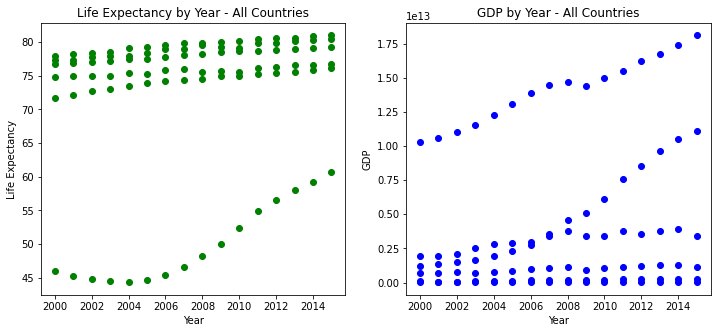

In [6]:
#plot life expectancy and GDP by of all countries
#set up data
year = list(data['Year'])
life = list(data['LifeExpectancy'])
gdp = list(data['GDP'])

#set figure size
plt.figure(figsize=(12,5))

#first plot
plt.subplot(1,2,1)
plt.scatter(year, life, color='green')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy by Year - All Countries')

#second plot
plt.subplot(1,2,2)
plt.scatter(year, gdp, color='blue')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP by Year - All Countries')

plt.show()

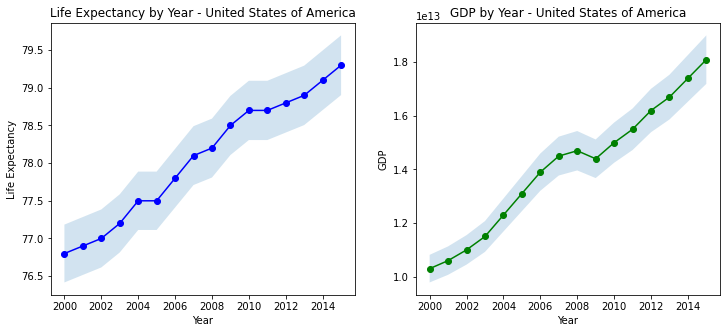

In [7]:
#plot life expectancy and GDP by year of a country
#close previous figure
plt.close('all')

#define function
def plotcountry(data, country):
    #select data of this country
    year = list(data.loc[data['Country']==country,'Year'])
    life = list(data.loc[data['Country']==country,'LifeExpectancy'])
    gdp = list(data.loc[data['Country']==country,'GDP'])
    
    #set figure size
    plt.figure(figsize=(12,5))
    
    #plot first plot - life expextancy
    plt.subplot(1,2,1)
    plt.plot(year, life, color='blue', marker='o')
    
    #fill error between
    upper = [x*(1+0.005) for x in life]
    lower = [x*(1-0.005) for x in life]
    plt.fill_between(year, lower, upper, alpha=0.2)
    
    #title and axis labels
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.title('Life Expectancy by Year - {}'.format(country))
    
    #plot second plot - gdp
    plt.subplot(1,2,2)
    plt.plot(year, gdp, color='green', marker='o')
    
    #fill error between
    upper = [x*(1+0.05) for x in gdp]
    lower = [x*(1-0.05) for x in gdp]
    plt.fill_between(year, lower, upper, alpha=0.2)
    
    #title and axis labels
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title('GDP by Year - {}'.format(country))
    
    plt.show()
    
plotcountry(data,'United States of America')

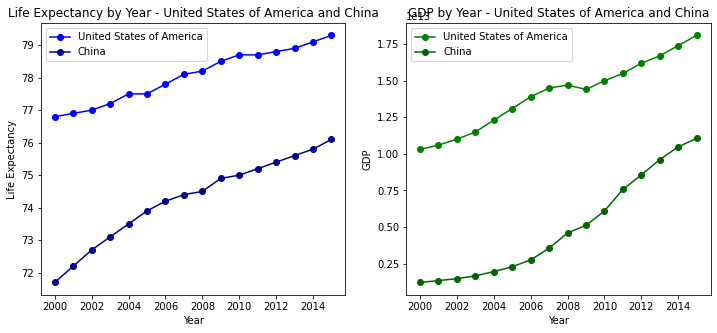

In [8]:
#plot life expectancy and GDP by year of 2 countries
#close previous figure
plt.close('all')

#define function
def plotcountry(data, country1, country2):
    #select data of this country
    year1 = list(data.loc[data['Country']==country1,'Year'])
    life1 = list(data.loc[data['Country']==country1,'LifeExpectancy'])
    gdp1 = list(data.loc[data['Country']==country1,'GDP'])
    
    year2 = list(data.loc[data['Country']==country2,'Year'])
    life2 = list(data.loc[data['Country']==country2,'LifeExpectancy'])
    gdp2 = list(data.loc[data['Country']==country2,'GDP'])
    
    #set figure size
    plt.figure(figsize=(12,5))
    
    #plot first plot - life expextancy
    plt.subplot(1,2,1)
    plt.plot(year1, life1, color='blue', marker='o', label=country1)
    plt.plot(year2, life2, color='darkblue', marker='o', label=country2)
    #title and axis labels and legend
    plt.xlabel('Year')
    plt.ylabel('Life Expectancy')
    plt.title('Life Expectancy by Year - {a} and {b}'.format(a=country1, b=country2))
    plt.legend()
    
    #plot second plot - gdp
    plt.subplot(1,2,2)
    plt.plot(year1, gdp1, color='green', marker='o', label=country1)
    plt.plot(year2, gdp2, color='darkgreen', marker='o', label=country2)
    
    #title and axis labels
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title('GDP by Year - {a} and {b}'.format(a=country1, b=country2))
    plt.legend()
    
    plt.show()
    
plotcountry(data,'United States of America','China')

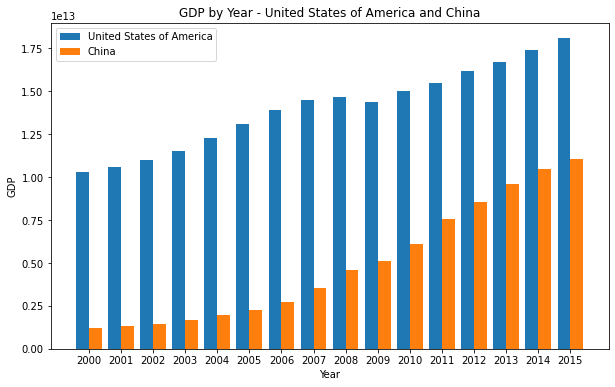

In [9]:
#plot GDP by year of 2 countries side by side
#close previous figure
plt.close('all')

#define function that sets up the locations for the side by side bars on the a xis
def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

#define function for side by side bar chart
def plotcountrysidebyside(data, country1, country2):
    #set up data
    years=data.sort_values(['Country', 'Year']).Year.unique()
    country_a = list(data.sort_values(['Country', 'Year']).loc[data['Country']==country1,'GDP'])
    country_b = list(data.sort_values(['Country', 'Year']).loc[data['Country']==country2,'GDP'])
    #print(years, country_a, country_b)
    
    #set up figure size
    plt.figure(figsize = (10, 6))

    #set up x axis by calling function create_x
    country_a_x = create_x(2,0.8,1,len(years))
    country_b_x = create_x(2,0.8,2,len(years))
    
    #plot bars
    plt.bar(country_a_x, country_a, label=country1)
    plt.bar(country_b_x, country_b, label=country2)

    #set x axis ticks
    ax = plt.subplot()
    middle_x = [(a+b)/2 for a, b in zip(country_a_x, country_b_x)]
    ax.set_xticks(middle_x)
    ax.set_xticklabels(years)

    #title and axis labels
    plt.xlabel('Year')
    plt.ylabel('GDP')
    plt.title('GDP by Year - {a} and {b}'.format(a=country1, b=country2))
    plt.legend()
    plt.show()
    
plotcountrysidebyside(data,'United States of America','China')

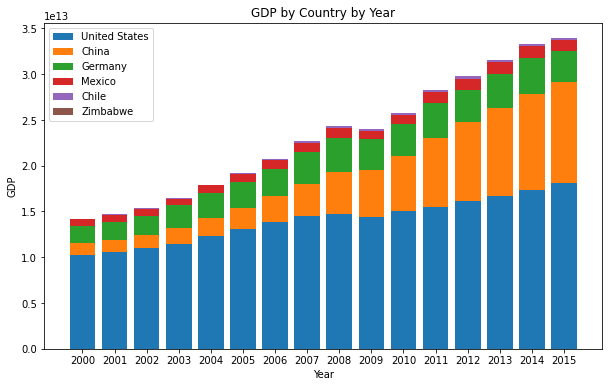

In [10]:
#plot stacked bar of GDP by country over the year

#set up data
#print(data.Country.unique())
years=data.sort_values(['Country', 'Year']).Year.unique()
gdp_us=list(data.sort_values(['Country', 'Year']).loc[data['Country']=='United States of America','GDP'])
gdp_cn=list(data.sort_values(['Country', 'Year']).loc[data['Country']=='China','GDP'])
gdp_ge=list(data.sort_values(['Country', 'Year']).loc[data['Country']=='Germany','GDP'])
gdp_mx=list(data.sort_values(['Country', 'Year']).loc[data['Country']=='Mexico','GDP'])
gdp_cl=list(data.sort_values(['Country', 'Year']).loc[data['Country']=='Chile','GDP'])
gdp_zi=list(data.sort_values(['Country', 'Year']).loc[data['Country']=='Zimbabwe','GDP'])

#close previous figure
plt.close('all')

#set figure size
plt.figure(figsize=(10,6))

#plot stacked bars
plt.bar(range(len(years)), gdp_us, label='United States')
plt.bar(range(len(years)), gdp_cn, bottom=gdp_us, label='China')
plt.bar(range(len(years)), gdp_ge, bottom=np.add(gdp_us, gdp_cn), label='Germany')
plt.bar(range(len(years)), gdp_mx, bottom=np.add(np.add(gdp_us, gdp_cn), gdp_ge), label='Mexico')
plt.bar(range(len(years)), gdp_cl, bottom=np.add(np.add(np.add(gdp_us, gdp_cn), gdp_ge),gdp_mx), label='Chile')
plt.bar(range(len(years)), gdp_zi, bottom=np.add(np.add(np.add(np.add(gdp_us, gdp_cn), gdp_ge),gdp_mx), gdp_zi), label='Zimbabwe')

#x axis ticks and labels
ax = plt.subplot()
ax.set_xticks(range(len(years)))
ax.set_xticklabels(years)

#title and axis labels and legend
plt.title('GDP by Country by Year')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()

plt.show()

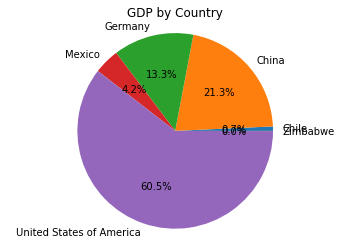

In [11]:
#plot gdp by country
#set up data
gdp_by_country = data.groupby('Country').agg({'GDP':'sum'}).reset_index()
country = list(gdp_by_country['Country'])
gdp = list(gdp_by_country['GDP'])

#close previous figure
plt.close('all')

#plot pie chart
plt.pie(gdp, labels=country, autopct='%0.1f%%')
plt.axis('equal')

#title and legend
plt.title('GDP by Country')

plt.show()